Mu初始值： [[0.38698923 0.49288087]]
SigmaSquare初始值： [[0.2544381  0.88496652]]
Alpha初始值： [[0.38326346 0.61673654]]
第 1000 次迭代:
Mu: [[1.78039524 1.71203529]]
Sigma: [[0.09969356 0.0904097 ]]
Alpha [[0.08404585 0.91595415]]
第 2000 次迭代:
Mu: [[1.78916289 1.6762647 ]]
Sigma: [[0.07487684 0.07604996]]
Alpha [[0.36772921 0.63227079]]
第 3000 次迭代:
Mu: [[1.76429172 1.6581583 ]]
Sigma: [[0.08107349 0.07111739]]
Alpha [[0.56176804 0.43823196]]
第 4000 次迭代:
Mu: [[1.75478623 1.65141152]]
Sigma: [[0.08375662 0.06935792]]
Alpha [[0.64202491 0.35797509]]
第 5000 次迭代:
Mu: [[1.7507228  1.64858993]]
Sigma: [[0.08494869 0.06851186]]
Alpha [[0.67745806 0.32254194]]
第 6000 次迭代:
Mu: [[1.74870678 1.64720648]]
Sigma: [[0.08554918 0.06804289]]
Alpha [[0.69531008 0.30468992]]
第 7000 次迭代:
Mu: [[1.74760691 1.64645663]]
Sigma: [[0.08587915 0.06776741]]
Alpha [[0.70512937 0.29487063]]
第 8000 次迭代:
Mu: [[1.74697315 1.6460262 ]]
Sigma: [[0.08607002 0.06760112]]
Alpha [[0.71081354 0.28918646]]
第 9000 次迭代:
Mu: [[1.74659623 1.64

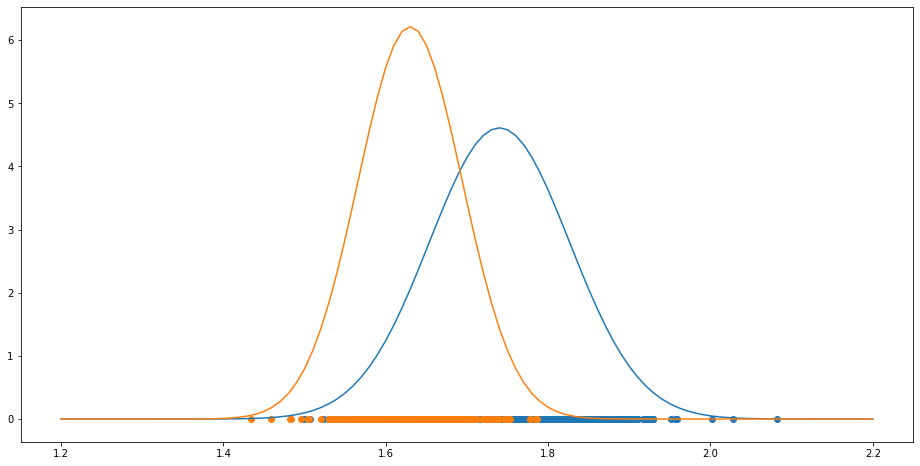

In [1]:
'''
高斯混合模型的实践（高斯一元分布）。
对于由参数未知的K个高斯混合模型生成的数据集，利用EM算法可以对这K个高斯分布进行参数估计，并且可以知道两个模型的各自比重。因此还可以用来聚类。
'''
 
import numpy as np
import matplotlib.pyplot as plt
 
def Normal(x,mu,sigma):#一元正态分布概率密度函数
    return np.exp(-(x-mu)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
 
'''
下面给出K=2，即由两个高斯分布组成的混合模型，分别是男女生身高分布。
已经给出了各自分布的比重、参数。用来检验算法生成的参数估计是否准确。
'''
 
N_boys=770#比重77%
N_girls=230#比重23%
N=N_boys+N_girls#观测集大小
K=2#高斯分布模型的数量
np.random.seed(1)
 
#男生身高数据
mu1=1.74#均值
sig1=0.0865#标准差
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1.2, 2.2, 0.01), Normal(np.arange(1.2, 2.2, 0.01),mu1,sig1))
BoyHeights=np.random.normal(mu1,sig1,N_boys)#返回随机数
BoyHeights.shape=N_boys,1
plt.scatter(BoyHeights, np.zeros((N_boys,1)))
 
#女生身高数据
mu2=1.63
sig2=0.0642
plt.plot(np.arange(1.2, 2.2, 0.01), Normal(np.arange(1.2, 2.2, 0.01),mu2,sig2))
GirlHeights=np.random.normal(mu2,sig2,N_girls)#返回随机数
GirlHeights.shape=N_girls,1
plt.scatter(GirlHeights, np.zeros((N_girls,1)))

data=np.concatenate((BoyHeights,GirlHeights))#合并身高数据，N行1列
 
#随机初始化模型参数
Mu=np.random.random((1,2))#平均值向量
print('Mu初始值：',Mu)
 
SigmaSquare=np.random.random((1,2))#模型迭代用Sigma平方
print('SigmaSquare初始值：',SigmaSquare)
 
#随机初始化各模型比重系数（大于等于0，且和为1）
a=np.random.random()
b=1-a
Alpha=np.array([[a,b]])
print('Alpha初始值：',Alpha)
print('===========================')
 
i=0#迭代次数
 
while(i<10000):#用EM算法迭代求参数估计
    i+=1
    
    #Expectation
    gauss1=Normal(data,Mu[0][0],np.sqrt(SigmaSquare[0][0]))#第一个模型
    gauss2=Normal(data,Mu[0][1],np.sqrt(SigmaSquare[0][1]))#第二个模型
    Gamma1=Alpha[0][0]*gauss1
    Gamma2=Alpha[0][1]*gauss2
    M=Gamma1+Gamma2
    G1=Gamma1/M
    G2=Gamma2/M
 
    #Maximization
    
    #更新SigmaSquare
    SigmaSquare[0][0]=np.dot(G1.T,(data-Mu[0][0])**2)/np.sum(G1)
    SigmaSquare[0][1]=np.dot(G2.T,(data-Mu[0][1])**2)/np.sum(G2)
 
    #更新Mu       
    Mu[0][0]=np.dot(G1.T,data)/np.sum(G1)
    Mu[0][1]=np.dot(G2.T,data)/np.sum(G2)
 
    #更新Alpha
    Alpha[0][0]=np.sum(G1)/N
    Alpha[0][1]=np.sum(G2)/N
    
    if(i%1000==0):
        print("第",i,"次迭代:")
        print("Mu:",Mu)
        print("Sigma:",np.sqrt(SigmaSquare))
        print("Alpha",Alpha)